### IMPORT LIBRARY AND LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Let's see who made one off purchase of $40761!
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
df['CASH_ADVANCE'].max()

47137.21176

In [7]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
df[df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


### VISUALIZE AND EXPLORE DATASET

<AxesSubplot:>

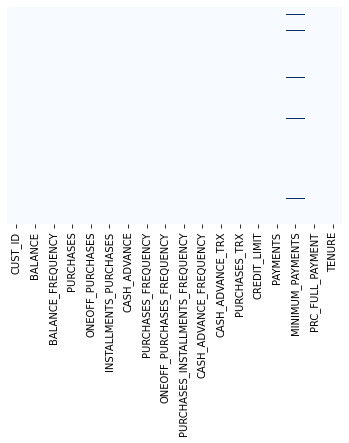

In [8]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [11]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

<AxesSubplot:>

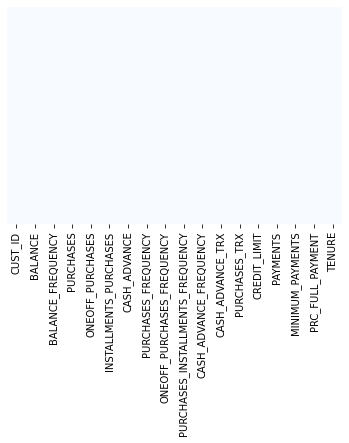

In [12]:
 sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [14]:
# Let's drop Customer ID since it has no meaning here 
df.drop("CUST_ID", axis = 1, inplace= True)

In [15]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(df.columns)
n

17

In [17]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

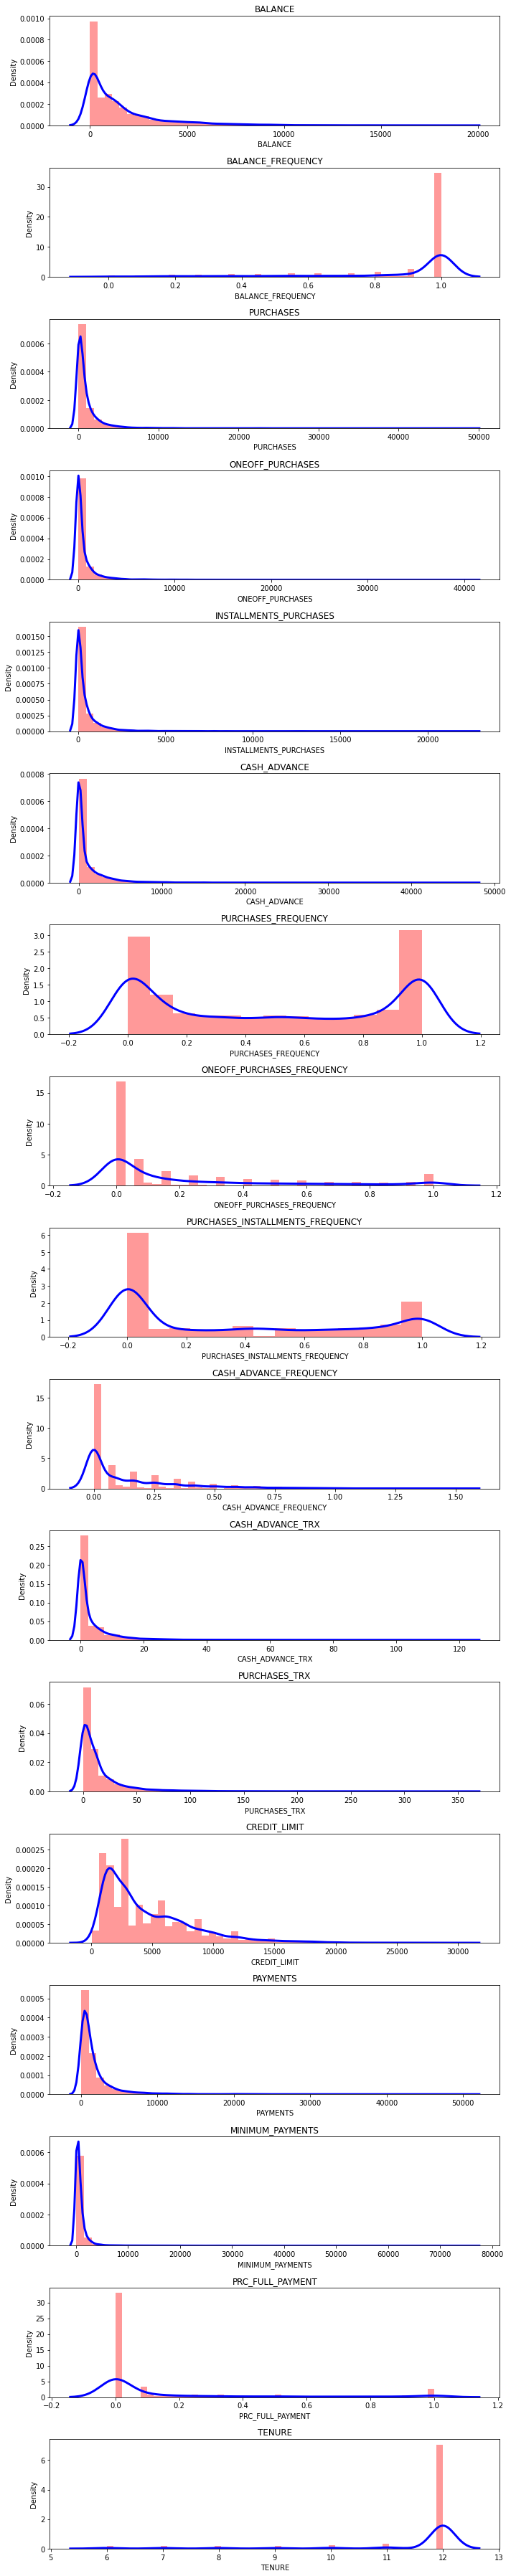

In [18]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
  plt.title(df.columns[i])

plt.tight_layout()

Above are the distribution plots of every variables in the dataframe

Here we have the overview of the whole distribution of the dataframe. We can see right away that these distributions are very left skewed and there are a lot of zero values. Let's explore the data furthur.

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Balance')

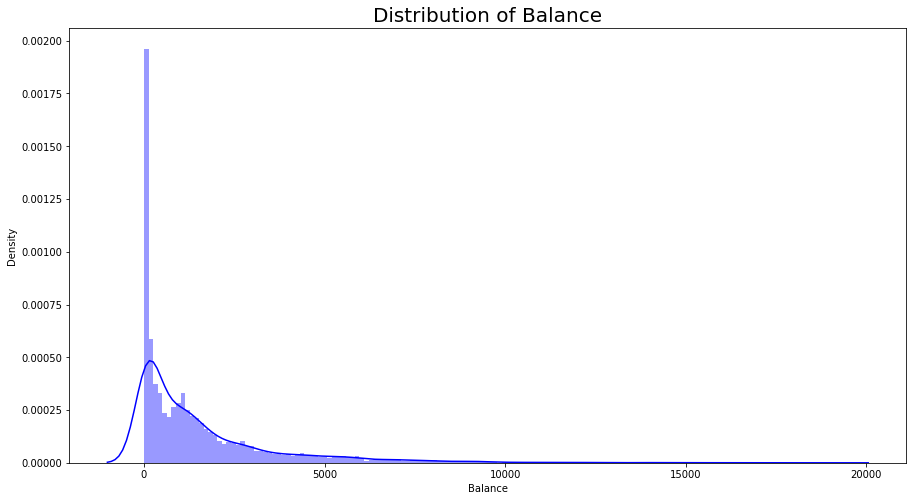

In [19]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['BALANCE'],bins=150, color='blue')
plt.title('Distribution of Balance', size=20)
plt.xlabel('Balance')

Above we have the distribution plot of the balance

Let's take a closer look at some variables in the dataset starting with balance. The distribution of balance (total amount of money that you owe to your credit card company) range from 0 to 20,000 dollars. The interesting thing is that there seems to be a very high number of credit card with 0 balance. This could be due because people are holding what is called "zero balance cards". The basic idea is that by keeping you balance low (in this case zero) but your credit limit high, this would increase your credit utilization ratio and in turn increases your credit score. For more information: https://www.investopedia.com/terms/z/zero-balance-card.asp#:~:text=Key%20Takeaways,any%20purchases%20on%20their%20cards.

Text(0.5, 1.0, 'Counts of Balance Frequency Score')

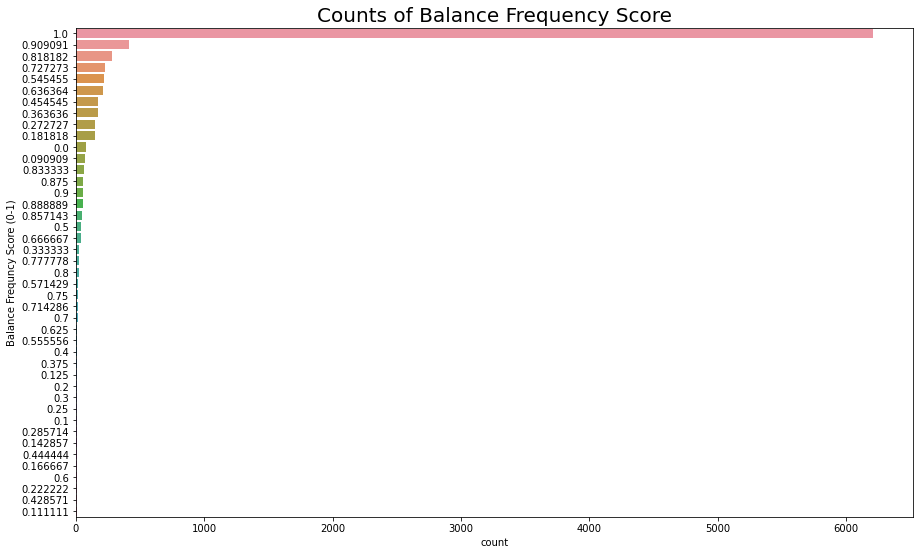

In [20]:
plt.rcParams['figure.figsize'] = (15,9)

sns.countplot(y=df['BALANCE_FREQUENCY'],order = df['BALANCE_FREQUENCY'].value_counts().index)
plt.ylabel('Balance Frequncy Score (0-1)')
plt.title('Counts of Balance Frequency Score', fontsize=20)

Here we have the count plot of balance frequency

Balance frequency is the score, 0-1, given to accounts based on how frequent the account's balances are updated. One being the highest score. So basically it is the measure of how frequent people use their credit card. As we can see here most of the accounts have the score of one, the best score, meaning that most people do use credit card frequently and only a small number of people keep their cards relatively inactive.

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Purchases')

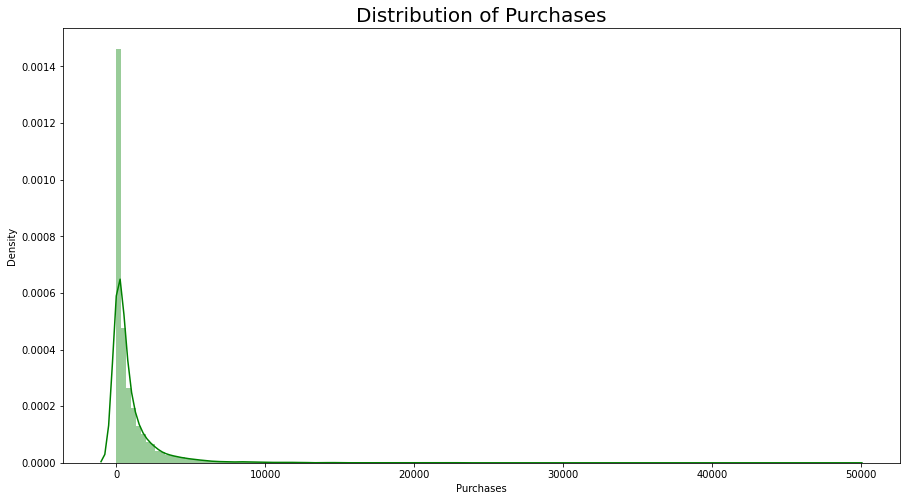

In [21]:
plt.rcParams['figure.figsize'] = (15,8)

sns.distplot(df['PURCHASES'], color='green', bins=150)
plt.title('Distribution of Purchases', size=20)
plt.xlabel('Purchases')

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Installments Purchases')

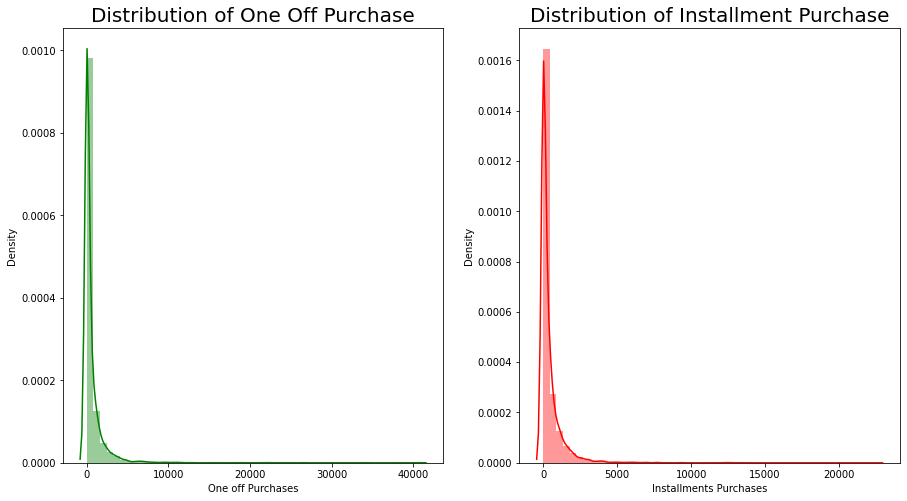

In [22]:
plt.subplot(1,2,1)
sns.distplot(df['ONEOFF_PURCHASES'],color='green')
plt.title('Distribution of One Off Purchase', fontsize = 20)
plt.xlabel('One off Purchases')


plt.subplot(1,2,2)
sns.distplot(df['INSTALLMENTS_PURCHASES'], color='red')
plt.title('Distribution of Installment Purchase', fontsize = 20)
plt.xlabel('Installments Purchases')

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without 

Text(0, 0.5, 'Credit limit')

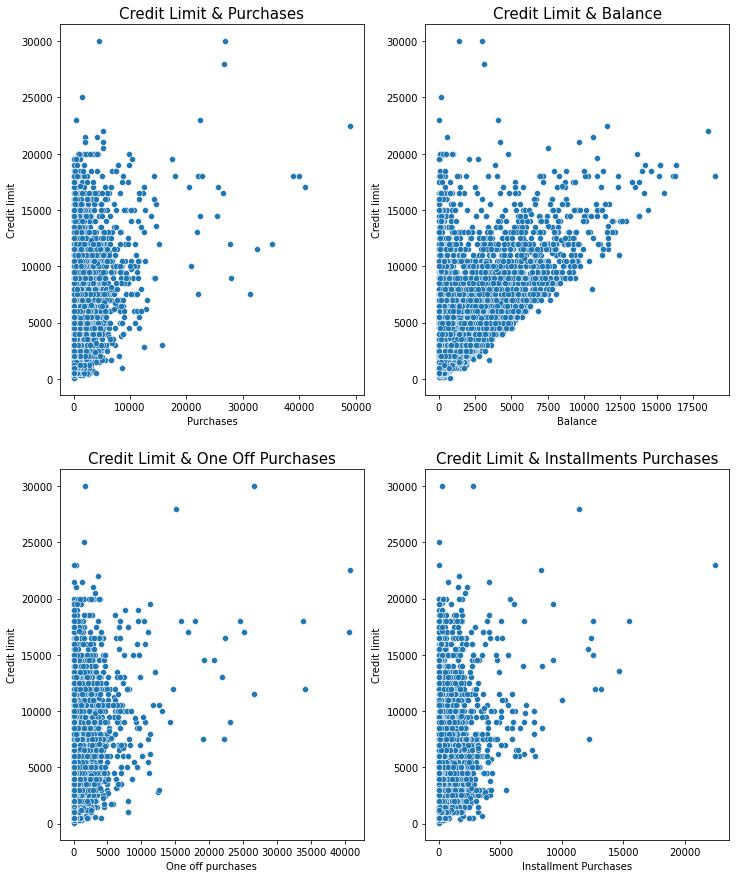

In [23]:
plt.rcParams['figure.figsize'] = (12,15)

plt.subplot(2,2,1)
sns.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit & Purchases', fontsize =15)
plt.xlabel('Purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,2)
sns.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'])
plt.title('Credit Limit & Balance', fontsize =15)
plt.xlabel('Balance')
plt.ylabel('Credit limit')

plt.subplot(2,2,3)
sns.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit & One Off Purchases', fontsize =15)
plt.xlabel('One off purchases')
plt.ylabel('Credit limit')

plt.subplot(2,2,4)
sns.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'])
plt.title('Credit Limit & Installments Purchases', fontsize =15)
plt.xlabel('Installment Purchases')
plt.ylabel('Credit limit')

Above is the scatter plot between credit limit vs balance and different types of purchase

Starting with different purchase types. These are interesting scatter plots since, intuitively, we would expect purchases to go up when the credit limit goes up. Afterall why get a credit card with high limit if you are not planning on using it but the graphs shows a different story. There seems to be no strong correlation between the credit limit and these variables. In fact, purchases amount tend to stay at zero while credit limit increases. This again, shows that credit cards users really do want to keep their balance low to utilized their credit. This might signify that, for most people, credit cards are tools for credit utilization rather than spending device.

As for balance, there seems to be a better correlation that as credit limit goes up balance also goes up but it is also clear to see that there are also points where balance stays at zeros but credit limits do go up.

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

Text(0.5, 0, 'Cash Advance Frequency')

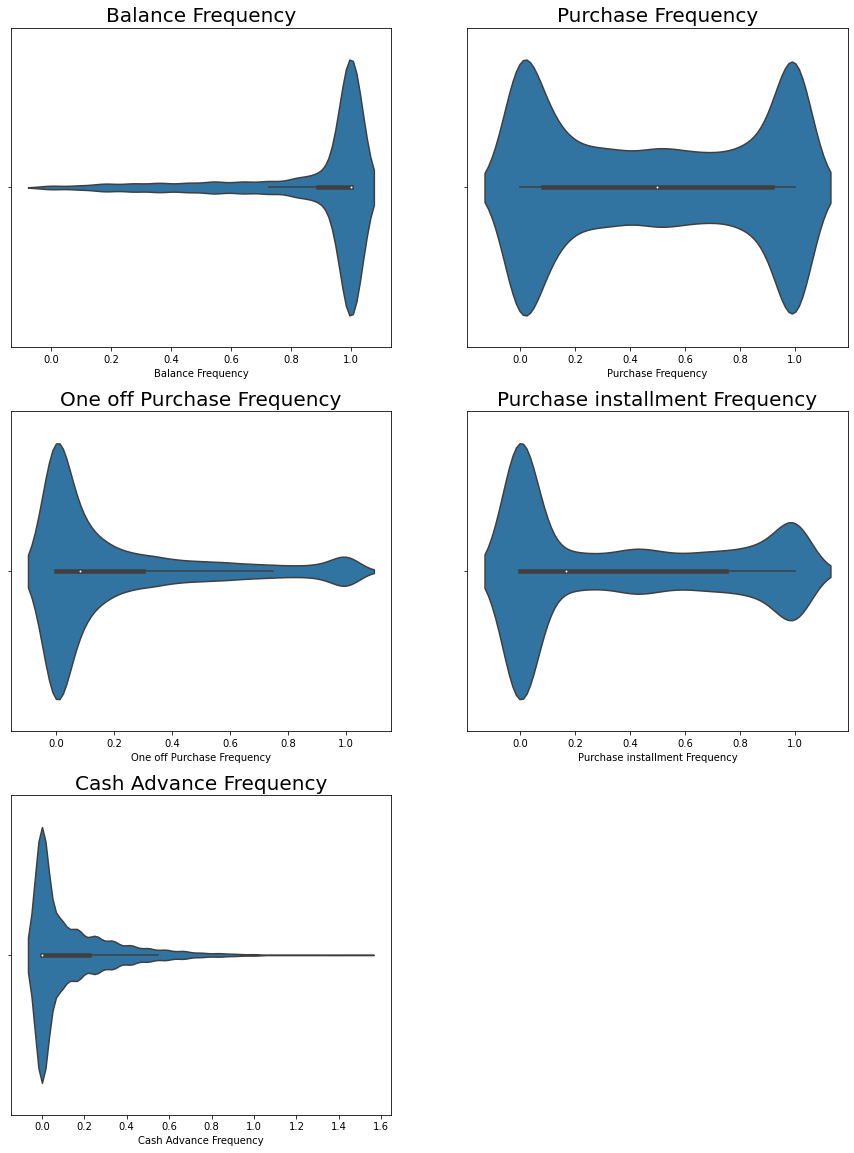

In [24]:
plt.rcParams['figure.figsize'] = (15,20)

plt.subplot(3,2,1)
sns.violinplot(df['BALANCE_FREQUENCY'])
plt.title('Balance Frequency', fontsize =20)
plt.xlabel('Balance Frequency')

plt.subplot(3,2,2)
sns.violinplot(df['PURCHASES_FREQUENCY'])
plt.title('Purchase Frequency', fontsize =20)
plt.xlabel('Purchase Frequency')

plt.subplot(3,2,3)
sns.violinplot(df['ONEOFF_PURCHASES_FREQUENCY'])
plt.title('One off Purchase Frequency', fontsize =20)
plt.xlabel('One off Purchase Frequency')

plt.subplot(3,2,4)
sns.violinplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.title('Purchase installment Frequency', fontsize =20)
plt.xlabel('Purchase installment Frequency')

plt.subplot(3,2,5)
sns.violinplot(df['CASH_ADVANCE_FREQUENCY'])
plt.title('Cash Advance Frequency', fontsize =20)
plt.xlabel('Cash Advance Frequency')

Above you can see various violin plots of the different frequency scores in this dataset.

This dataset includes various frequency scores (0-1) that tell use the frequency of each variables for each datapoint with 0 being the lowest score and one being the higest score. I think it would be interesting to map them out together and analyse them.

Starting with balance frequency. This is the measurement of how often people update their balance. As we can see, there is a very large amount of people scoring around one meaning that people do, in fact, update their balance frequently. As we have seen early their is a tendency for credit card holders to keep their balance low for credit utiliztion. The fact that a lot of people score so high might be due to the fact that these people are paying off their balance often in order to keep them low or even to have zero balance.

Next we have purchase frequency or how often do people make purchses. There seems to be the same number of people scoring low and high. This tell us that there seems to be equal amount of people who purchase often with their credit cards and equal number of people who rarely do. This is an interesting finding since when we look at the distribution balance earlier we could see that there are way more people with zero and low balance compare to people with high balance. Intuitively, if there are equal amount of people who purchase frequntly and people who do not, then we would expect that the distribution of balance to have both low and high number as well. Then again, we saw earlier, because of the high balance frequncy, that maybe people are just really good at paying off their credit cards.

Comparing between one off purchase frequency and installment purchase frequency we can see that most of the people have around zero score meaning people rarely purchase in the first place. Looking at people who do, we can see that there are more people with higher installment frequency score than that of one off purchase. This signifys that people prefer to use installment purchase more often than one off ones.

Lastly we have cash advance frequency. This tell use how often people get cash advance and as we can see most people score around zero, meaning they do not get cash advance frequently.

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cash Advance Transaction')

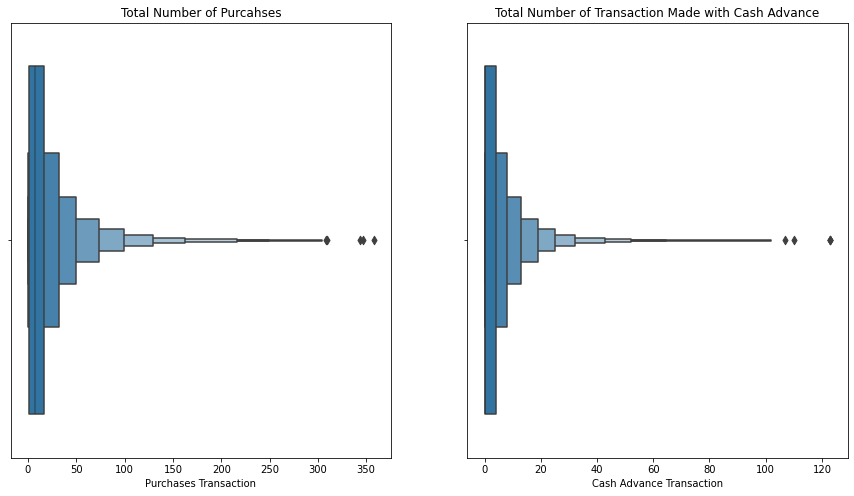

In [25]:
#ONE for purchase TRX, cash advance trx
plt.rcParams['figure.figsize'] = (15,8)

plt.subplot(1,2,1)
sns.boxenplot(df['PURCHASES_TRX'])
plt.title('Total Number of Purcahses')
plt.xlabel('Purchases Transaction')

plt.subplot(1,2,2)
sns.boxenplot(df['CASH_ADVANCE_TRX'])
plt.title('Total Number of Transaction Made with Cash Advance')
plt.xlabel('Cash Advance Transaction')

Above are boxen plots of the total number of purchases and those which are done using cash in advance

As we would expect by now, there are a large number of people with low number of transaction since we are under the assumption that people are using credit card for credit untilization and not for purchasing. And there are only a few people purchasing at high quantity. A few people purchase over 300 times and fewer did more than 100 times with cash advance.

In [26]:
correlations = df.corr()

Text(0.5, 1.0, 'Heat Map')

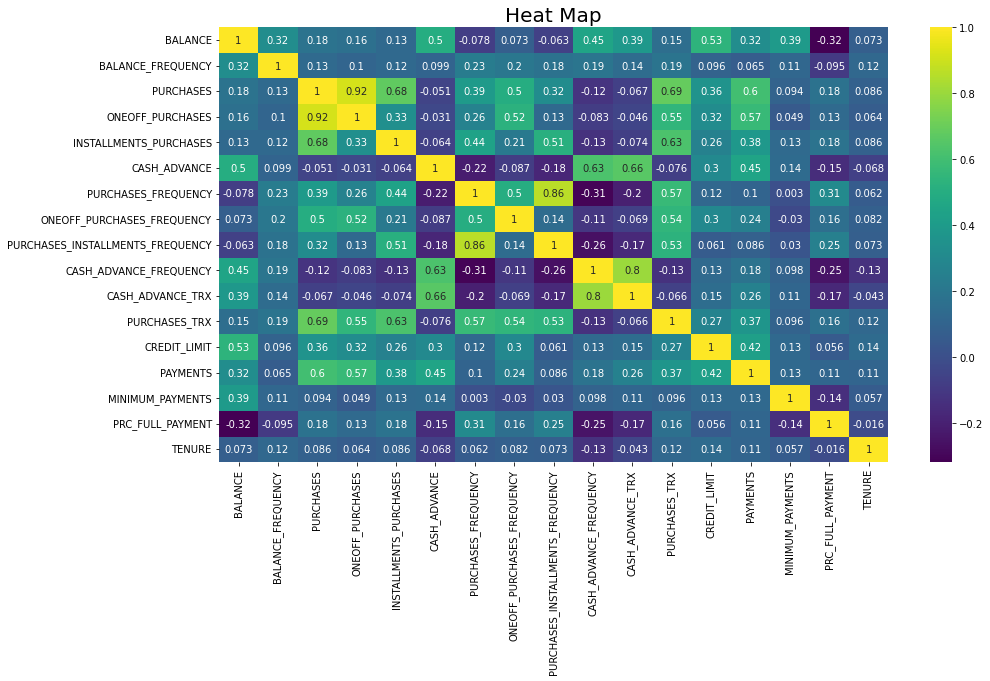

In [27]:
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Heat Map', fontsize =20)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


Above is the heatmap of the dataset

Here we can take a closer look at the correlation with in the dataset. Purchases and one off purchase have very high correlation as we would expect at 0.92. This is the same for varaibles and their frequency score counter parts such as cash advance trx and cash advance frequency at 0.8. Not surprisingly things like balance and payment have poor correlation. This tell us that the data do make sense.

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Months')

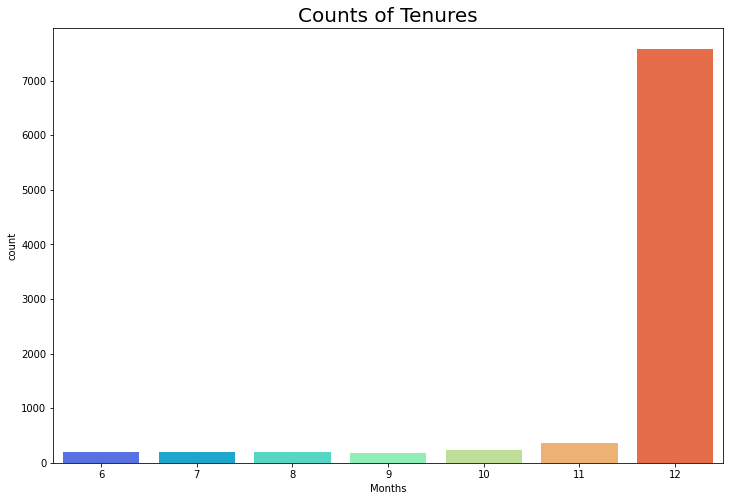

In [28]:
plt.rcParams['figure.figsize'] = (12,8)
sns.countplot(df['TENURE'], palette='rainbow')
plt.title('Counts of Tenures', fontsize = 20)
plt.xlabel('Months')

Here we have the count plot of tenure

Tenure is the repayment period of the cards, ranging from 6-12 months. Interestingly most of the cards are 12 months cards. The longer your tenure the more interest rate you pay but also the more time you have to pay back and that seems to be the option that people are going for.

### FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [29]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [30]:
df_scaled.shape

(8950, 17)

In [31]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Text(0, 0.5, 'WCSS_1')

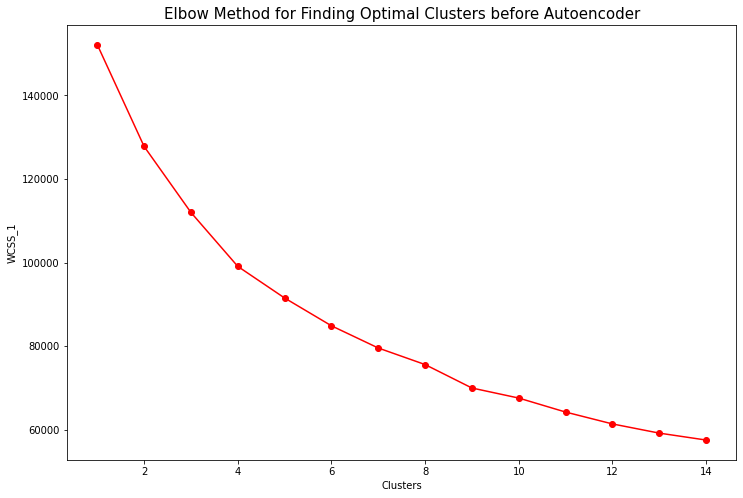

In [32]:
# model building, elbow method
from sklearn.cluster import KMeans

WCSS_1= []

for i in range(1,15): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(df_scaled)
    WCSS_1.append(km.inertia_)
    
plt.plot(range(1,15),WCSS_1, marker='o', c = 'r')
plt.title('Elbow Method for Finding Optimal Clusters before Autoencoder', fontsize =15)
plt.xlabel('Clusters')
plt.ylabel('WCSS_1')


In [33]:
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

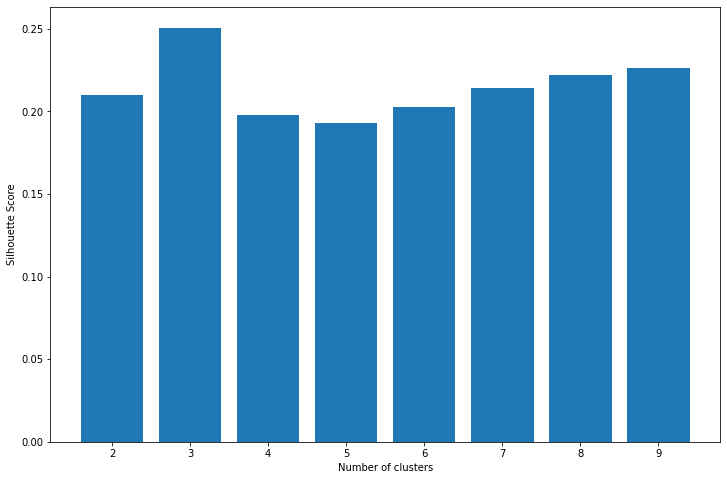

In [34]:
silhouette_scores = [] 

for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df_scaled, KMeans(n_clusters = n_cluster).fit_predict(df_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7, 8, 9] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### APPLY K-MEANS METHOD

In [93]:
kmeans = KMeans(4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [94]:
kmeans.cluster_centers_.shape

(4, 17)

In [95]:
df_new = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [96]:
df_new['cluster'].value_counts()

0    3987
1    3356
2    1211
3     396
Name: cluster, dtype: int64

In [97]:
#review the average ratings and reviews in different clusters
df_cluster = df_new[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster']].groupby('cluster').mean()
df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,1001.005970,0.788200,271.939521,210.019777,62.186030,587.257049,0.173753,0.086588,0.083759,0.113400,2.088789,2.954101,3270.641531,969.926377,583.218720,0.078489,11.446200
1,905.791559,0.937092,1253.194401,602.898862,650.570653,212.959723,0.887271,0.300053,0.713633,0.042835,0.794994,22.340882,4243.688991,1349.662131,656.360877,0.270134,11.598331
2,4581.056816,0.968588,490.310239,311.533526,178.860669,4483.238948,0.283679,0.136685,0.182423,0.482869,14.213047,7.514451,7500.788229,3451.238065,1996.497757,0.034823,11.385632
3,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,2.194444,90.401515,9747.474747,7413.195964,1992.044515,0.288053,11.949495


In [98]:
#transform the numbers into proportions
balance_range = df_cluster['BALANCE'].max() - df_cluster['BALANCE'].min()
df_cluster['balance_prop'] = (df_cluster['BALANCE'] - df_cluster['BALANCE'].min()) / balance_range
balance_frequency_range = df_cluster['BALANCE_FREQUENCY'].max() - df_cluster['BALANCE_FREQUENCY'].min()
df_cluster['balance_frequency_prop'] = (df_cluster['BALANCE_FREQUENCY'] - df_cluster['BALANCE_FREQUENCY'].min()) / balance_frequency_range

purchase_range = df_cluster['PURCHASES'].max() - df_cluster['PURCHASES'].min()
df_cluster['purchase_prop'] = (df_cluster['PURCHASES'] - df_cluster['PURCHASES'].min()) / purchase_range
oneoff_purchase_range = df_cluster['ONEOFF_PURCHASES'].max() - df_cluster['ONEOFF_PURCHASES'].min()
df_cluster['oneoff_purchase_prop'] = (df_cluster['ONEOFF_PURCHASES'] - df_cluster['ONEOFF_PURCHASES'].min()) / oneoff_purchase_range
#transform the numbers into proportions
installments_purchase_range = df_cluster['INSTALLMENTS_PURCHASES'].max() - df_cluster['INSTALLMENTS_PURCHASES'].min()
df_cluster['installments_purchase_prop'] = (df_cluster['INSTALLMENTS_PURCHASES'] - df_cluster['INSTALLMENTS_PURCHASES'].min()) / installments_purchase_range
cash_advance_range = df_cluster['CASH_ADVANCE'].max() - df_cluster['CASH_ADVANCE'].min()
df_cluster['cash_advance_prop'] = (df_cluster['CASH_ADVANCE'] - df_cluster['CASH_ADVANCE'].min()) / cash_advance_range
#transform the numbers into proportions
purchase_frequency_range =df_cluster['PURCHASES_FREQUENCY'].max() - df_cluster['PURCHASES_FREQUENCY'].min()
df_cluster['purchase_frequency_prop'] = (df_cluster['PURCHASES_FREQUENCY'] - df_cluster['PURCHASES_FREQUENCY'].min()) / purchase_frequency_range
oneoff_purchase_frequency_range = df_cluster['ONEOFF_PURCHASES_FREQUENCY'].max() - df_cluster['ONEOFF_PURCHASES_FREQUENCY'].min()
df_cluster['oneoff_purchase_frequency_prop'] = (df_cluster['ONEOFF_PURCHASES_FREQUENCY'] - df_cluster['ONEOFF_PURCHASES_FREQUENCY'].min()) / oneoff_purchase_frequency_range
#transform the numbers into proportions
purchase_installment_frequency_range = df_cluster['PURCHASES_INSTALLMENTS_FREQUENCY'].max() - df_cluster['PURCHASES_INSTALLMENTS_FREQUENCY'].min()
df_cluster['purchase_installment_frequency_prop'] = (df_cluster['PURCHASES_INSTALLMENTS_FREQUENCY'] - df_cluster['PURCHASES_INSTALLMENTS_FREQUENCY'].min()) / purchase_installment_frequency_range
cash_advance_frequency_range =df_cluster['CASH_ADVANCE_FREQUENCY'].max() - df_cluster['CASH_ADVANCE_FREQUENCY'].min()
df_cluster['cash_advance_frequency_prop'] = (df_cluster['CASH_ADVANCE_FREQUENCY'] - df_cluster['CASH_ADVANCE_FREQUENCY'].min()) / cash_advance_frequency_range
#transform the numbers into proportions
cash_advance_trx_range = df_cluster['CASH_ADVANCE_TRX'].max() - df_cluster['CASH_ADVANCE_TRX'].min()
df_cluster['cash_advance_trx_prop'] = (df_cluster['CASH_ADVANCE_TRX'] - df_cluster['CASH_ADVANCE_TRX'].min()) / cash_advance_trx_range
purchase_trx_range = df_cluster['PURCHASES_TRX'].max() - df_cluster['PURCHASES_TRX'].min()
df_cluster['purchase_trx_prop'] = (df_cluster['PURCHASES_TRX'] - df_cluster['PURCHASES_TRX'].min()) / purchase_trx_range
#transform the numbers into proportions
credit_limit_range = df_cluster['CREDIT_LIMIT'].max() - df_cluster['CREDIT_LIMIT'].min()
df_cluster['credit_limit_prop'] = (df_cluster['CREDIT_LIMIT'] - df_cluster['CREDIT_LIMIT'].min()) / credit_limit_range
payment_range = df_cluster['PAYMENTS'].max() - df_cluster['PAYMENTS'].min()
df_cluster['payment_prop'] = (df_cluster['PAYMENTS'] - df_cluster['PAYMENTS'].min()) / payment_range
#transform the numbers into proportions
minimum_payment_range = df_cluster['MINIMUM_PAYMENTS'].max() - df_cluster['MINIMUM_PAYMENTS'].min()
df_cluster['minimum_payment_prop'] = (df_cluster['MINIMUM_PAYMENTS'] - df_cluster['MINIMUM_PAYMENTS'].min()) / minimum_payment_range
prc_full_payment_range = df_cluster['PRC_FULL_PAYMENT'].max() - df_cluster['PRC_FULL_PAYMENT'].min()
df_cluster['prc_full_payment_prop'] = (df_cluster['PRC_FULL_PAYMENT'] - df_cluster['PRC_FULL_PAYMENT'].min()) / prc_full_payment_range
#transform the numbers into proportions
tenure_range = df_cluster['TENURE'].max() - df_cluster['TENURE'].min()
df_cluster['tenure_prop'] = (df_cluster['TENURE'] - df_cluster['TENURE'].min()) / tenure_range

df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,oneoff_purchase_frequency_prop,purchase_installment_frequency_prop,cash_advance_frequency_prop,cash_advance_trx_prop,purchase_trx_prop,credit_limit_prop,payment_prop,minimum_payment_prop,prc_full_payment_prop,tenure_prop
cluster,,,,,,,,,,,,,,,,,,,,,
0,1001.005970,0.788200,271.939521,210.019777,62.186030,587.257049,0.173753,0.086588,0.083759,0.113400,...,0.000000,0.000000,0.160362,0.096422,0.000000,0.000000,0.000000,0.000000,0.172439,0.107417
1,905.791559,0.937092,1253.194401,602.898862,650.570653,212.959723,0.887271,0.300053,0.713633,0.042835,...,0.325155,0.894877,0.000000,0.000000,0.221696,0.150235,0.058935,0.051754,0.929239,0.377218
2,4581.056816,0.968588,490.310239,311.533526,178.860669,4483.238948,0.283679,0.136685,0.182423,0.482869,...,0.076309,0.140175,1.000000,1.000000,0.052150,0.653120,0.385101,1.000000,0.000000,0.000000
3,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,...,1.000000,1.000000,0.068549,0.104296,1.000000,1.000000,1.000000,0.996849,1.000000,1.000000


In [99]:
df_cluster.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'balance_prop', 'balance_frequency_prop', 'purchase_prop',
       'oneoff_purchase_prop', 'installments_purchase_prop',
       'cash_advance_prop', 'purchase_frequency_prop',
       'oneoff_purchase_frequency_prop', 'purchase_installment_frequency_prop',
       'cash_advance_frequency_prop', 'cash_advance_trx_prop',
       'purchase_trx_prop', 'credit_limit_prop', 'payment_prop',
       'minimum_payment_prop', 'prc_full_payment_prop', 'tenure_prop'],
      dtype='object')

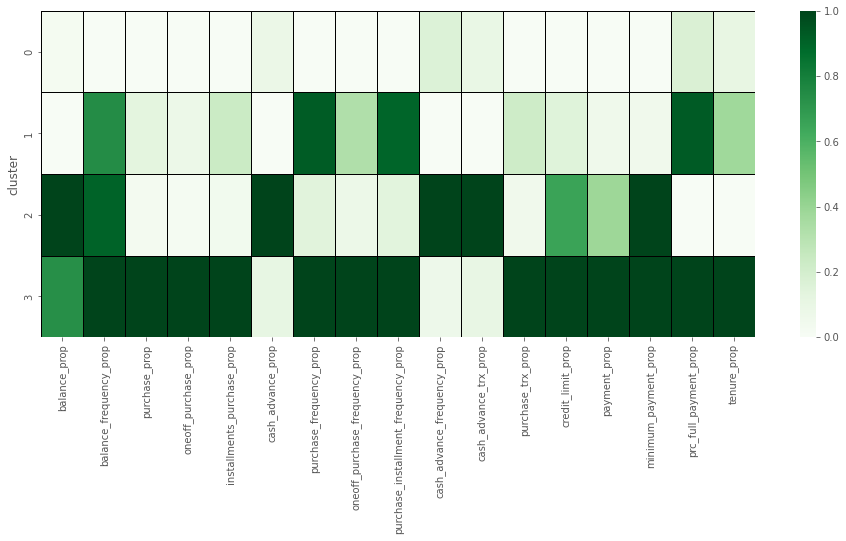

In [100]:
#heatmap to easily understand the value difference between clusters
plt.subplots(figsize=(16, 6))
sns.heatmap(df_cluster[['balance_prop', 'balance_frequency_prop', 'purchase_prop',
       'oneoff_purchase_prop', 'installments_purchase_prop',
       'cash_advance_prop', 'purchase_frequency_prop',
       'oneoff_purchase_frequency_prop', 'purchase_installment_frequency_prop',
       'cash_advance_frequency_prop', 'cash_advance_trx_prop',
       'purchase_trx_prop', 'credit_limit_prop', 'payment_prop',
       'minimum_payment_prop', 'prc_full_payment_prop', 'tenure_prop']], cmap = 'Greens',  linewidths=1, linecolor='black')
plt.show()

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Purchases')

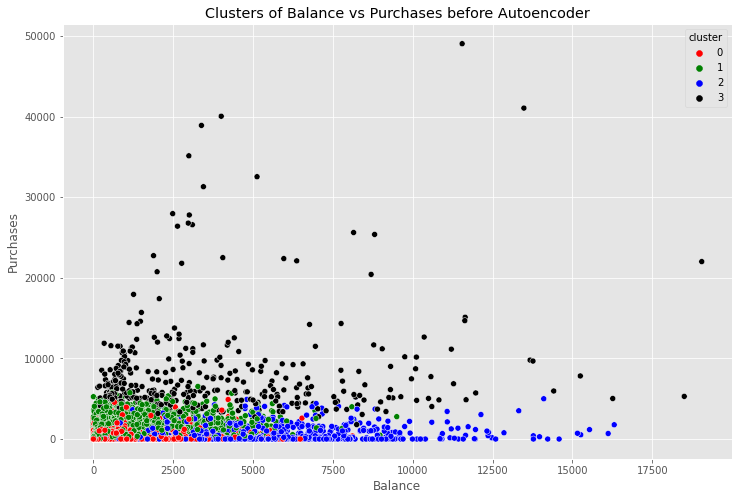

In [102]:
# A closer look at balance vs purchases with clusters centers
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_new['BALANCE'],df_new['PURCHASES'], hue=df_new['cluster'], palette=['red','green','blue', 'black'])
plt.title('Clusters of Balance vs Purchases before Autoencoder')
plt.xlabel('Balance')
plt.ylabel('Purchases')

Here is the scatter plot of balance and purchases seperated by clusters

Here we can see that cluster 0 are high spenders with the highest balance while cluster 1 are people with higher balance but not as big of spenders. Cluster 2,3 are people who do not spend as much and have relatively lower balance (down to zero)

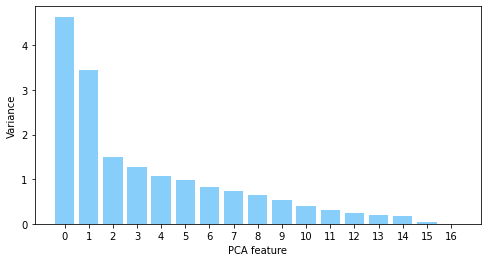

In [44]:
#variance explained with the number of features
pca = PCA(random_state=123)
pca.fit(df_scaled)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:17], pca.explained_variance_[:17], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:17])
plt.show()

In [45]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222033, -1.07644849],
       [-1.13829606,  2.50649576],
       [ 0.96968477, -0.38351709],
       ...,
       [-0.92620319, -1.81079232],
       [-2.33655148, -0.6579756 ],
       [-0.55642211, -0.40047167]])

In [46]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
7995,-2.204511,2.692159
6925,0.114716,-1.124394
5547,2.893529,-0.290001
2243,-1.598812,-0.921079
356,2.400479,-1.137586


In [47]:
#explaining the explained variances in PCA1 and PCA2
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27290037, 0.20301991])

This array is vector of variances of PCA1 and PCA2 which is explained by them respectively.This shows that first PCA explains 27% variance while second explains 20% variance which together explains (27+20)% = 47% of variances in the data.

In [48]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076448,0
1,-1.138296,2.506496,2
2,0.969685,-0.383517,0
3,-0.873628,0.043174,0
4,-1.599434,-0.688582,0


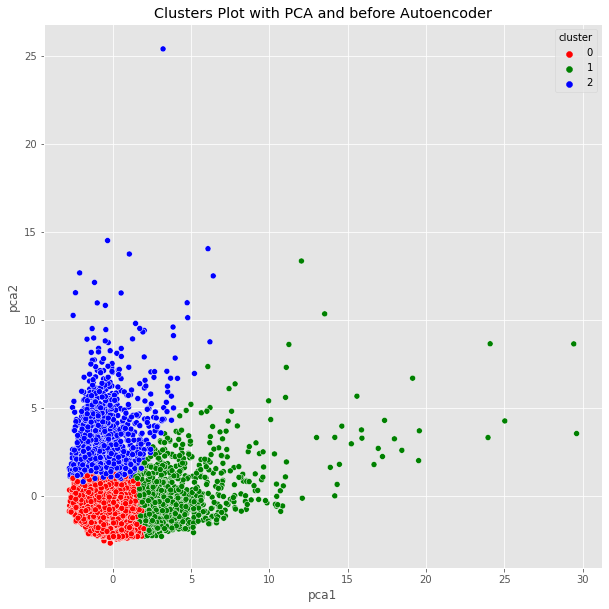

In [49]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue'])
plt.title('Clusters Plot with PCA and before Autoencoder')
plt.show()

### APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [50]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error', metrics ='accuracy')


2022-03-18 18:31:18.070507: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
df_scaled.shape

(8950, 17)

In [52]:
autoencoder.fit(df_scaled, df_scaled, batch_size = 128, epochs = 50,  verbose = 1)

Epoch 1/50
70/70 [==============================] - 3s 33ms/step - loss: 0.5947 - accuracy: 0.3122
Epoch 2/50
70/70 [==============================] - 2s 30ms/step - loss: 0.3214 - accuracy: 0.5171
Epoch 3/50
70/70 [==============================] - 2s 24ms/step - loss: 0.2487 - accuracy: 0.5880
Epoch 4/50
70/70 [==============================] - 1s 19ms/step - loss: 0.2034 - accuracy: 0.6351
Epoch 5/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1739 - accuracy: 0.6713
Epoch 6/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1602 - accuracy: 0.6740
Epoch 7/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1446 - accuracy: 0.6939
Epoch 8/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1312 - accuracy: 0.7152
Epoch 9/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1179 - accuracy: 0.7307
Epoch 10/50
70/70 [==============================] - 1s 20ms/step - loss: 0.1085 - accuracy: 0.7404
Epoch 11/

In [53]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [54]:
#autoencoder.save_weights('autoencoder.h5')

In [55]:
pred = encoder.predict(df_scaled)

In [56]:
pred.shape

(8950, 10)

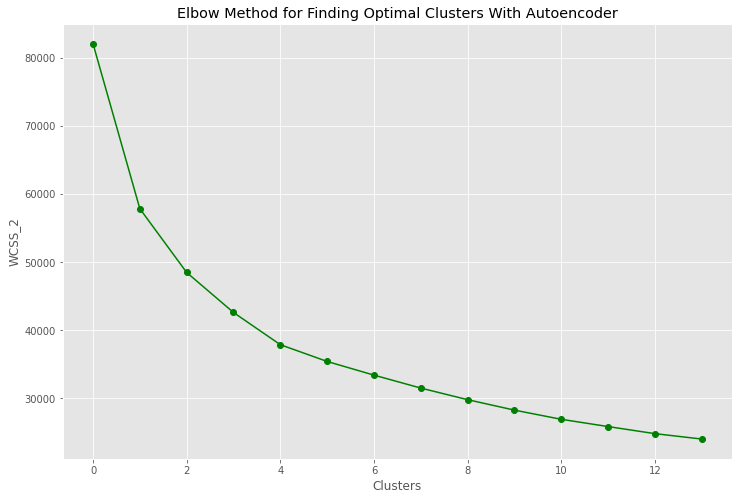

In [57]:
WCSS_2 = []

range_values = range(1, 15)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  WCSS_2.append(kmeans.inertia_)

plt.plot(WCSS_2, marker ='o', c = 'g')
plt.title('Elbow Method for Finding Optimal Clusters With Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('WCSS_2') 
plt.show()

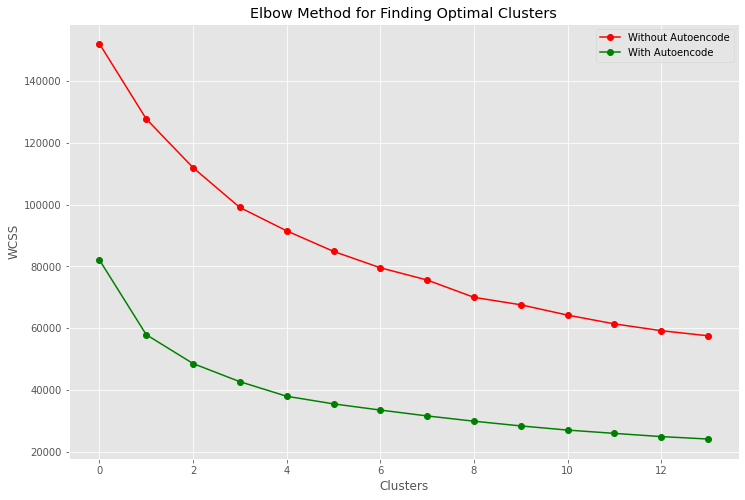

In [58]:
plt.plot(WCSS_1, marker ='o', color = 'r', label='Without Autoencode')

plt.plot(WCSS_2, marker ='o', color = 'g', label='With Autoencode')
plt.title('Elbow Method for Finding Optimal Clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.legend()
plt.show()

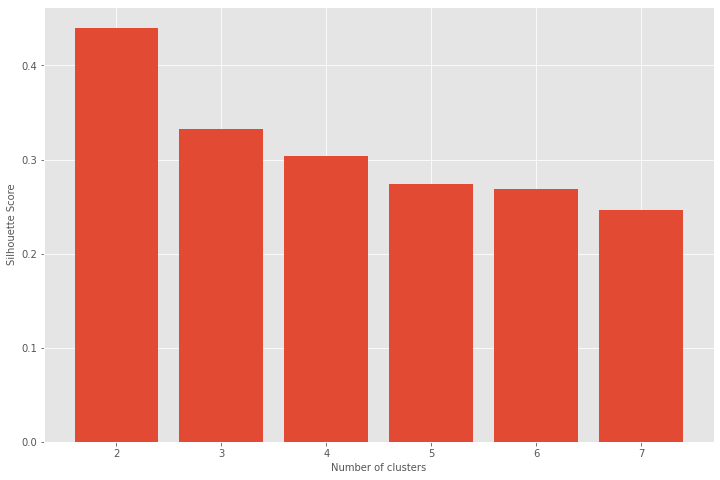

In [59]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pred, KMeans(n_clusters = n_cluster).fit_predict(pred))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [60]:
kmeans_dl = KMeans(3)
kmeans_dl.fit(pred)
labels_dl = kmeans_dl.labels_

In [61]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster_dl':labels_dl})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_dl
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [62]:
df_cluster_dr['cluster_dl'].value_counts()

2    5761
0    2921
1     268
Name: cluster_dl, dtype: int64

In [63]:
#review the average ratings and reviews in different clusters
df_cluster_dl = df_cluster_dr[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster_dl']].groupby('cluster_dl').mean()
df_cluster_dl

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster_dl,,,,,,,,,,,,,,,,,
0,1508.491198,0.877197,1541.382109,814.300294,727.353701,1037.012175,0.796345,0.309593,0.651842,0.134026,3.479288,24.613831,5022.729712,2175.946414,944.027477,0.245913,10.900719
1,4297.811707,0.976091,8248.852649,5036.809478,3214.281978,2516.444908,0.940760,0.666893,0.840476,0.192248,7.496269,101.194030,10076.305970,10032.604264,3267.114372,0.264306,11.626866
2,1465.706194,0.872711,393.267421,273.195343,120.296422,877.864374,0.314249,0.126532,0.196570,0.133055,2.934386,5.664989,3966.929195,1122.541236,711.952377,0.101823,11.824857


In [64]:
#transform the numbers into proportions
balance_range = df_cluster_dl['BALANCE'].max() - df_cluster_dl['BALANCE'].min()
df_cluster_dl['balance_prop'] = (df_cluster_dl['BALANCE'] - df_cluster_dl['BALANCE'].min()) / balance_range
balance_frequency_range = df_cluster_dl['BALANCE_FREQUENCY'].max() - df_cluster_dl['BALANCE_FREQUENCY'].min()
df_cluster_dl['balance_frequency_prop'] = (df_cluster_dl['BALANCE_FREQUENCY'] - df_cluster_dl['BALANCE_FREQUENCY'].min()) / balance_frequency_range

purchase_range = df_cluster_dl['PURCHASES'].max() - df_cluster_dl['PURCHASES'].min()
df_cluster_dl['purchase_prop'] = (df_cluster_dl['PURCHASES'] - df_cluster_dl['PURCHASES'].min()) / purchase_range
oneoff_purchase_range = df_cluster_dl['ONEOFF_PURCHASES'].max() - df_cluster_dl['ONEOFF_PURCHASES'].min()
df_cluster_dl['oneoff_purchase_prop'] = (df_cluster_dl['ONEOFF_PURCHASES'] - df_cluster_dl['ONEOFF_PURCHASES'].min()) / oneoff_purchase_range
#transform the numbers into proportions
installments_purchase_range = df_cluster_dl['INSTALLMENTS_PURCHASES'].max() - df_cluster_dl['INSTALLMENTS_PURCHASES'].min()
df_cluster_dl['installments_purchase_prop'] = (df_cluster_dl['INSTALLMENTS_PURCHASES'] - df_cluster_dl['INSTALLMENTS_PURCHASES'].min()) / installments_purchase_range
cash_advance_range = df_cluster_dl['CASH_ADVANCE'].max() - df_cluster_dl['CASH_ADVANCE'].min()
df_cluster_dl['cash_advance_prop'] = (df_cluster_dl['CASH_ADVANCE'] - df_cluster_dl['CASH_ADVANCE'].min()) / cash_advance_range
#transform the numbers into proportions
purchase_frequency_range =df_cluster_dl['PURCHASES_FREQUENCY'].max() - df_cluster_dl['PURCHASES_FREQUENCY'].min()
df_cluster_dl['purchase_frequency_prop'] = (df_cluster_dl['PURCHASES_FREQUENCY'] - df_cluster_dl['PURCHASES_FREQUENCY'].min()) / purchase_frequency_range
oneoff_purchase_frequency_range = df_cluster_dl['ONEOFF_PURCHASES_FREQUENCY'].max() - df_cluster_dl['ONEOFF_PURCHASES_FREQUENCY'].min()
df_cluster_dl['oneoff_purchase_frequency_prop'] = (df_cluster_dl['ONEOFF_PURCHASES_FREQUENCY'] - df_cluster_dl['ONEOFF_PURCHASES_FREQUENCY'].min()) / oneoff_purchase_frequency_range
#transform the numbers into proportions
purchase_installment_frequency_range = df_cluster_dl['PURCHASES_INSTALLMENTS_FREQUENCY'].max() - df_cluster_dl['PURCHASES_INSTALLMENTS_FREQUENCY'].min()
df_cluster_dl['purchase_installment_frequency_prop'] = (df_cluster_dl['PURCHASES_INSTALLMENTS_FREQUENCY'] - df_cluster_dl['PURCHASES_INSTALLMENTS_FREQUENCY'].min()) / purchase_installment_frequency_range
cash_advance_frequency_range =df_cluster_dl['CASH_ADVANCE_FREQUENCY'].max() - df_cluster_dl['CASH_ADVANCE_FREQUENCY'].min()
df_cluster_dl['cash_advance_frequency_prop'] = (df_cluster_dl['CASH_ADVANCE_FREQUENCY'] - df_cluster_dl['CASH_ADVANCE_FREQUENCY'].min()) / cash_advance_frequency_range
#transform the numbers into proportions
cash_advance_trx_range = df_cluster_dl['CASH_ADVANCE_TRX'].max() - df_cluster_dl['CASH_ADVANCE_TRX'].min()
df_cluster_dl['cash_advance_trx_prop'] = (df_cluster_dl['CASH_ADVANCE_TRX'] - df_cluster_dl['CASH_ADVANCE_TRX'].min()) / cash_advance_trx_range
purchase_trx_range = df_cluster_dl['PURCHASES_TRX'].max() - df_cluster_dl['PURCHASES_TRX'].min()
df_cluster_dl['purchase_trx_prop'] = (df_cluster_dl['PURCHASES_TRX'] - df_cluster_dl['PURCHASES_TRX'].min()) / purchase_trx_range
#transform the numbers into proportions
credit_limit_range = df_cluster_dl['CREDIT_LIMIT'].max() - df_cluster_dl['CREDIT_LIMIT'].min()
df_cluster_dl['credit_limit_prop'] = (df_cluster_dl['CREDIT_LIMIT'] - df_cluster_dl['CREDIT_LIMIT'].min()) / credit_limit_range
payment_range = df_cluster_dl['PAYMENTS'].max() - df_cluster_dl['PAYMENTS'].min()
df_cluster_dl['payment_prop'] = (df_cluster_dl['PAYMENTS'] - df_cluster_dl['PAYMENTS'].min()) / payment_range
#transform the numbers into proportions
minimum_payment_range = df_cluster_dl['MINIMUM_PAYMENTS'].max() - df_cluster_dl['MINIMUM_PAYMENTS'].min()
df_cluster_dl['minimum_payment_prop'] = (df_cluster_dl['MINIMUM_PAYMENTS'] - df_cluster_dl['MINIMUM_PAYMENTS'].min()) / minimum_payment_range
prc_full_payment_range = df_cluster_dl['PRC_FULL_PAYMENT'].max() - df_cluster_dl['PRC_FULL_PAYMENT'].min()
df_cluster_dl['prc_full_payment_prop'] = (df_cluster_dl['PRC_FULL_PAYMENT'] - df_cluster_dl['PRC_FULL_PAYMENT'].min()) / prc_full_payment_range
#transform the numbers into proportions
tenure_range = df_cluster_dl['TENURE'].max() - df_cluster_dl['TENURE'].min()
df_cluster_dl['tenure_prop'] = (df_cluster_dl['TENURE'] - df_cluster_dl['TENURE'].min()) / tenure_range

df_cluster_dl

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,oneoff_purchase_frequency_prop,purchase_installment_frequency_prop,cash_advance_frequency_prop,cash_advance_trx_prop,purchase_trx_prop,credit_limit_prop,payment_prop,minimum_payment_prop,prc_full_payment_prop,tenure_prop
cluster_dl,,,,,,,,,,,,,,,,,,,,,
0,1508.491198,0.877197,1541.382109,814.300294,727.353701,1037.012175,0.796345,0.309593,0.651842,0.134026,...,0.338775,0.707047,0.016407,0.119447,0.198357,0.172816,0.118226,0.090826,0.886799,0.000000
1,4297.811707,0.976091,8248.852649,5036.809478,3214.281978,2516.444908,0.940760,0.666893,0.840476,0.192248,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.785756
2,1465.706194,0.872711,393.267421,273.195343,120.296422,877.864374,0.314249,0.126532,0.196570,0.133055,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [65]:
df_cluster_dl.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'balance_prop', 'balance_frequency_prop', 'purchase_prop',
       'oneoff_purchase_prop', 'installments_purchase_prop',
       'cash_advance_prop', 'purchase_frequency_prop',
       'oneoff_purchase_frequency_prop', 'purchase_installment_frequency_prop',
       'cash_advance_frequency_prop', 'cash_advance_trx_prop',
       'purchase_trx_prop', 'credit_limit_prop', 'payment_prop',
       'minimum_payment_prop', 'prc_full_payment_prop', 'tenure_prop'],
      dtype='object')

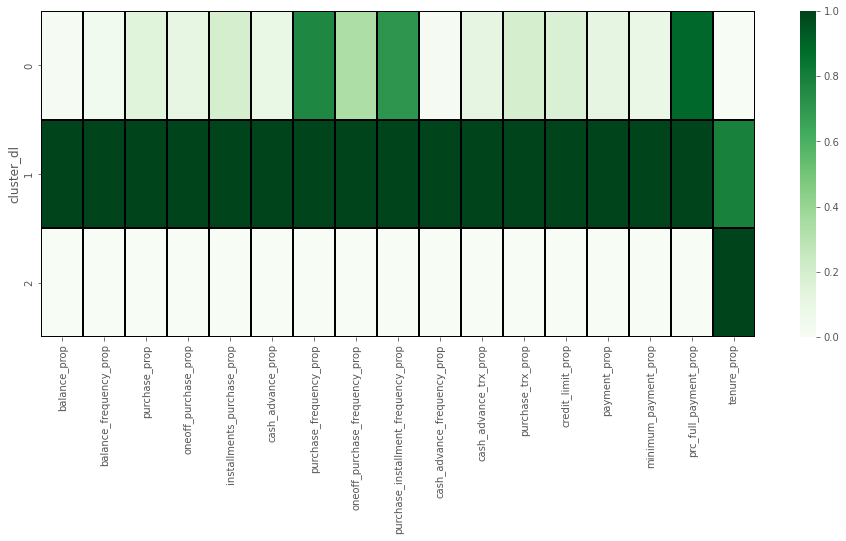

In [66]:
#heatmap to easily understand the value difference between clusters
plt.subplots(figsize=(16, 6))
sns.heatmap(df_cluster_dl[['balance_prop', 'balance_frequency_prop', 'purchase_prop',
       'oneoff_purchase_prop', 'installments_purchase_prop',
       'cash_advance_prop', 'purchase_frequency_prop',
       'oneoff_purchase_frequency_prop', 'purchase_installment_frequency_prop',
       'cash_advance_frequency_prop', 'cash_advance_trx_prop',
       'purchase_trx_prop', 'credit_limit_prop', 'payment_prop',
       'minimum_payment_prop', 'prc_full_payment_prop', 'tenure_prop']], cmap = 'Greens',  linewidths=1.5, linecolor='black')
plt.show()

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Purchases')

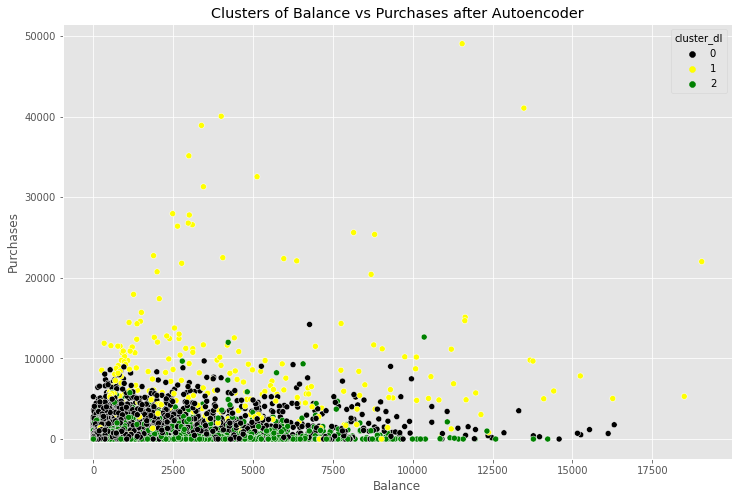

In [67]:
# A closer look at balance vs purchases with clusters centers
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_cluster_dr['BALANCE'],df_cluster_dr['PURCHASES'], hue=df_cluster_dr['cluster_dl'], palette=['black','yellow', 'green'])
plt.title('Clusters of Balance vs Purchases after Autoencoder')
plt.xlabel('Balance')
plt.ylabel('Purchases')

/Users/hothanhphong/opt/anaconda3/envs/Tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Installments Purchases')

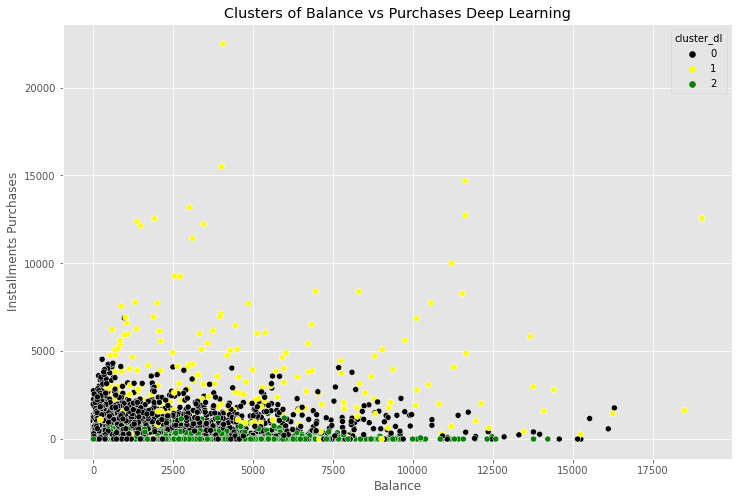

In [68]:
# A closer look at balance vs purchases with clusters centers
plt.rcParams['figure.figsize'] = (12,8)
sns.scatterplot(df_cluster_dr['BALANCE'],df_cluster_dr['INSTALLMENTS_PURCHASES'], hue=df_cluster_dr['cluster_dl'], palette=['black','yellow', 'green'])
plt.title('Clusters of Balance vs Purchases Deep Learning')
plt.xlabel('Balance')
plt.ylabel('Installments Purchases')

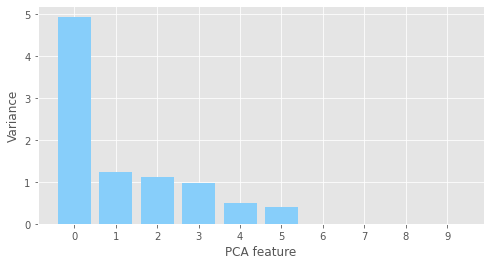

In [69]:
#variance explained with the number of features
pca = PCA(random_state=123)
pca.fit(pred)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:17], pca.explained_variance_[:17], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:17])
plt.show()

In [70]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(pred)
principal_comp_new

array([[-1.9717095 , -0.12736809],
       [-1.9213483 ,  0.64282423],
       [-0.04566534, -0.4691952 ],
       ...,
       [ 1.9690335 ,  2.2031374 ],
       [-0.27747408,  2.2471843 ],
       [ 3.7820377 ,  3.8218884 ]], dtype=float32)

In [71]:
# Create a dataframe with the two components
pca_df_dl = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df_dl.sample(5)

,pca1,pca2
3722,-1.827972,0.826852
3118,5.841014,-1.140901
3573,-1.946427,-0.311488
4296,0.850941,-1.959193
4417,-1.995198,-0.442535


In [72]:
pca_df_dl = pd.concat([pca_df_dl, pd.DataFrame({'cluster':labels_dl})], axis = 1)
pca_df_dl.head()

,pca1,pca2,cluster
0,-1.971709,-0.127368,2
1,-1.921348,0.642824,2
2,-0.045665,-0.469195,2
3,-2.273722,-0.384313,2
4,-2.226933,-0.279950,2


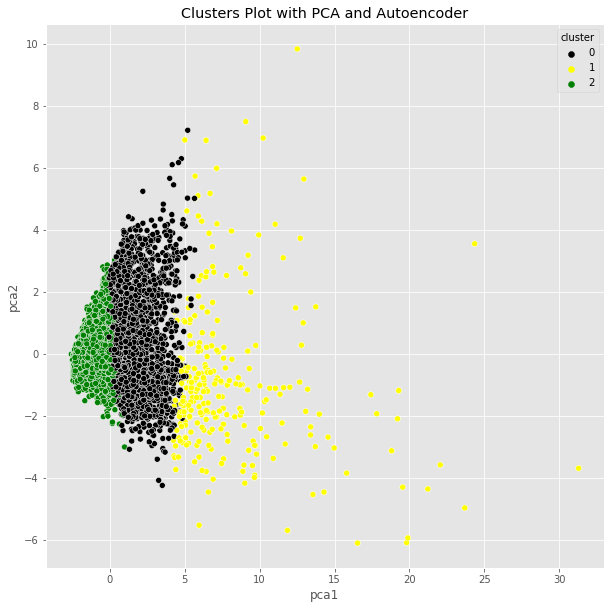

In [73]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df_dl, palette =['black','yellow', 'green'])
plt.title('Clusters Plot with PCA and Autoencoder')
plt.show()

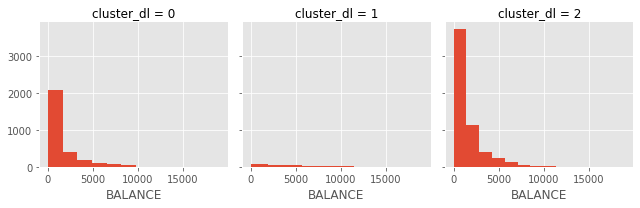

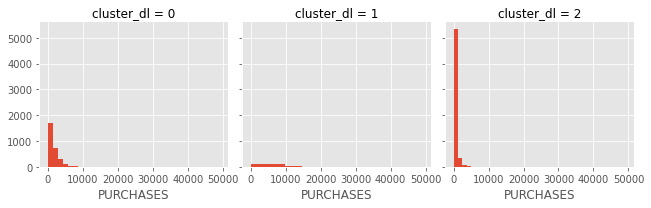

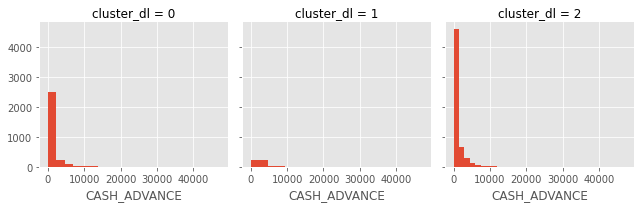

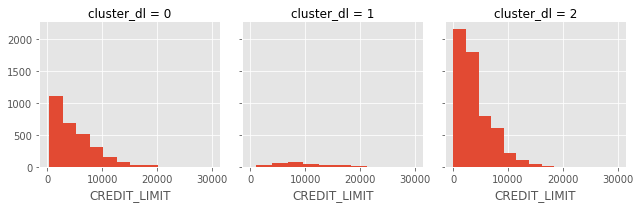

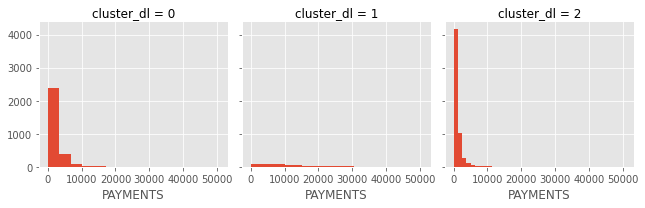

In [74]:
for c in ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']:
    grid= sns.FacetGrid(df_cluster_dr, col='cluster_dl')
    grid.map(plt.hist, c)

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS